In [10]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq

In [11]:
cs_data_file = 'data/TB000208a.outputs.xlsx'
data_path = 'data/TB000208a'
train_sheets = ['GT-Rep1-N7_S1','GT-Rep2-N7_S2','GT-Rep3-N7_S3']
test_sheets = ['Pool-Rep1-N7_S4','Pool-Rep2-N7_S5','Pool-Rep3-N7_S6']

In [12]:
# GT_rep1 = pd.read_excel(cs_data_file, sheet_name=train_sheets[0])
# GT_rep2 = pd.read_excel(cs_data_file, sheet_name=train_sheets[1])
# GT_rep3 = pd.read_excel(cs_data_file, sheet_name=train_sheets[2])

Pool_rep1 = pd.read_excel(cs_data_file, sheet_name=test_sheets[0])
Pool_rep2 = pd.read_excel(cs_data_file, sheet_name=test_sheets[1])
Pool_rep3 = pd.read_excel(cs_data_file, sheet_name=test_sheets[2])

In [13]:
# pd.merge(GT_rep1, GT_rep2, on=['chrom', 'seq_start']).set_index(['id', 'name']).sum(axis=1)

# merged_df = pd.concat([GT_rep1, GT_rep2, GT_rep3, Pool_rep1, Pool_rep2, Pool_rep3])
merged_df = pd.concat([Pool_rep1, Pool_rep2, Pool_rep3])

merged_df = merged_df.groupby(['chrom', 'seq_start','seq_end','seq'], as_index=False)['count'].sum()

merged_df

,chrom,seq_start,seq_end,seq,count
0,JM_pCS_10_Bxb1_attP_HN,937,982,GTTTGTCTGGTCAACCACCGCGGTCTCAGTGGTGTACGGTACAAAC,6
1,PL312,1883,1928,CGTGGTCCAGACCGCCACCGCGGCGCCGTCGTCCGCGACCCACACC,4
2,PL312,2905,2950,CCGGATGATCCTGACGACGGAGACCGCCGTCGTCGACAAGCCGGCC,3910
3,PL312,2905,2950,GGCCGGCTTGTCGACGACGGCGGTCTCCGTCGTCAGGATCATCCGG,5553
4,chr1,88137,88182,AGTACCAGGACGGGCCATTGAGCACCCTGGTGTTGAGAGCAAGTGG,8
...,...,...,...,...,...
169397,chrY,56851164,56851209,TGTGAGAGATCTGTCCACTGATCACCCAACTGATGTAACTATTGTC,3
169398,chrY,56851176,56851221,AGGCAAAGCCTAGACAATAGTTACATCAGTTGGGTGATCAGTGGAC,5
169399,chrY,56862625,56862670,CACTCCAGCCTGGGTGACAGAATGAGACGTTGTCTAAAAAAAAAAA,1
169400,chrY,56865420,56865465,TCAGAGTTTGGGCTCAGCCGCGGTAGCTGCTGTTGACCCAGAGGGA,21


In [14]:
weighted_seqs = []
binary_seqs = []
for index,row in merged_df.iterrows():
    count = row['count']
    seq = row['seq']
    rv_seq = str(Seq(seq).reverse_complement())
    if 'N' in seq or 'N' in rv_seq:
        continue
    for i in range(count):
        seq_no_dinucleotide = seq[0:22] + 'NN' + seq[24:]
        rv_seq_no_dinucleotide = rv_seq[0:22] + 'NN' + rv_seq[24:]
        weighted_seqs.append(seq_no_dinucleotide)
        weighted_seqs.append(rv_seq_no_dinucleotide)
    binary_seqs.append(seq_no_dinucleotide)
    binary_seqs.append(rv_seq_no_dinucleotide)
    
# Initialize a dictionary with lists to hold counts for each base
weighted_base_counts = {'A': [0] * len(weighted_seqs[0]), 'T': [0] * len(weighted_seqs[0]),
               'C': [0] * len(weighted_seqs[0]), 'G': [0] * len(weighted_seqs[0])}

# Initialize a dictionary with lists to hold counts for each base
binary_base_counts = {'A': [0] * len(binary_seqs[0]), 'T': [0] * len(binary_seqs[0]),
               'C': [0] * len(binary_seqs[0]), 'G': [0] * len(binary_seqs[0])}

# Count the bases at each position
for seq in weighted_seqs:
    for position, base in enumerate(seq):
        if base == 'N':
            continue
        weighted_base_counts[base][position] += 1

# Count the bases at each position
for seq in binary_seqs:
    for position, base in enumerate(seq):
        if base == 'N':
            continue
        binary_base_counts[base][position] += 1

# Create a DataFrame from the dictionary
weighted_df = pd.DataFrame(weighted_base_counts)

# Create a DataFrame from the dictionary
binary_df = pd.DataFrame(binary_base_counts)

# If you want the position to be the index of the DataFrame:
weighted_df.index.name = 'Position'
binary_df.index.name = 'Position'

,A,T,C,G
Position,,,,
0,1788783,1831199,1397511,1455457
1,1801489,1710465,1408386,1552610
2,1677635,1735314,1825639,1234362
3,1642678,1972227,1441526,1416519
4,1667864,1740709,1287856,1776521
5,1325674,1855063,1026549,2265664
6,1679447,1928462,616236,2248805
7,1648961,1882056,712970,2228963
8,801241,3287491,2127658,256560


In [15]:
consensus_sequence  = ''.join(weighted_df.idxmax(axis=1))
print(consensus_sequence)

TACTGGGGTTTTGACAACAGAGAACTCTGTTGTCAAAACCCCAGTA


,A,C,G,T
pos,,,,
0,0.002857,0.002232,0.002325,0.002925
1,0.001747,0.001366,0.001506,0.001659
2,0.003905,0.004250,0.002873,0.004039
3,0.003366,0.002953,0.002902,0.004041
4,0.002818,0.002176,0.003001,0.002941
5,0.012975,0.010047,0.022175,0.018156
6,0.031552,0.011577,0.042248,0.036230
7,0.025242,0.010914,0.034121,0.028810
8,0.051776,0.137489,0.016579,0.212437


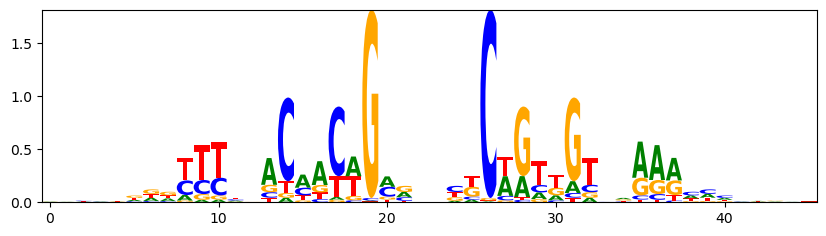

In [16]:
weighted_df_transformed = logomaker.transform_matrix(weighted_df, from_type='counts', to_type='information')
weighted_logo = logomaker.Logo(weighted_df_transformed)
plt.savefig('weighted_logo.png')
weighted_df_transformed.to_csv('weighted_halfsite_averaged_cryptic_seq_matrix.csv',index=False)
weighted_df_transformed

In [18]:
import lightmotif

# just freeing some memory

GT_rep1 = []
GT_rep2 = []
GT_rep3 = []

Pool_rep1 = []
Pool_rep2 = []
Pool_rep3 = []

merged_df = []

# Create a count matrix from an iterable of sequences
motif = lightmotif.create(weighted_seqs)

# Create a PSSM with 0.1 pseudocounts and uniform background frequencies
pwm = motif.counts.normalize(0.1)
pssm = pwm.log_odds()

genome_file = '/data/references/hg38.fa'

# get consensus sequence by getting max of each row 
consensus_sequence = ''.join(weighted_df.idxmax(axis=1))

consensus_striped = lightmotif.stripe(consensus_sequence)

# Compute scores using the fastest backend implementation for the host machine
scores = pssm.calculate(consensus_striped)
consensus_score = scores[0]
print(consensus_score)

all_scores = []
normalized_score_threshold = 0.38

for record in SeqIO.parse(genome_file, "fasta"):
    chrom = record.id
    print(chrom)
    seq = str(record.seq).upper()
    striped = lightmotif.stripe(seq)
    seq = Seq(seq)
    # seq_rv = str(record.seq.reverse_complement()).upper()
    # Encode the target sequence into a striped matrix
    
    # striped_rv = lightmotif.stripe(seq_rv)

    # Compute scores using the fastest backend implementation for the host machine
    scores = pssm.calculate(striped)
    # scores_rv = pssm.calculate(striped_rv)
    all_scores.append([ (chrom,e+1,e+1+len(consensus_sequence)-1,str(seq[e:e+len(consensus_sequence)]),str(seq[e:e+len(consensus_sequence)].reverse_complement()), str(seq[e+22:e+24]),str(seq[e+22:e+24].reverse_complement()),(consensus_score/i)) for e,i in enumerate(scores) if (consensus_score/i) >= normalized_score_threshold])
    # all_scores.append([ (chrom,e+1,e+1+len(consensus_sequence)-1,seq_rv[e:e+len(consensus_sequence)],seq_rv[e+22:e+24],(consensus_score/i)) for e,i in enumerate(scores_rv) if (consensus_score/i) >= normalized_score_threshold])
all_scores = [item for sublist in all_scores for item in sublist]

all_scores_df = pd.DataFrame(all_scores, columns=["chrom","start","end","sequence","rv_comp_sequence","plus_strand_central_dinucleotide","minus_strand_central_dinucleotide","normalized_score"])

all_scores_df.to_csv('hg38_pwm_scores.csv',index=False)

# all_scores = []

# for record in SeqIO.parse(genome_file, "fasta"):
#     chrom = record.id
#     print(chrom)
#     seq_rv = str(record.seq.reverse_complement()).upper()
#     # Encode the target sequence into a striped matrix
#     striped_rv = lightmotif.stripe(seq_rv)

#     # Compute scores using the fastest backend implementation for the host machine
#     scores_rv = pssm.calculate(striped_rv)
#     all_scores.append([ (chrom,e+1,e+1+len(consensus_sequence)-1,seq_rv[e:e+len(consensus_sequence)],seq_rv[e+22:e+24],(consensus_score/i)) for e,i in enumerate(scores_rv) if (consensus_score/i) >= normalized_score_threshold])

# all_scores = [item for sublist in all_scores for item in sublist]

# all_scores_df = pd.DataFrame(all_scores, columns=["chrom","start","end","sequence","central_dinucleotide","normalized_score"])

# all_scores_df.to_csv('hg38_pwm_scores_minus_strand.csv',index=False)


-13.822358131408691
chr1
chr10
chr11
chr11_KI270721v1_random
chr12
chr13
chr14
chr14_GL000009v2_random
chr14_GL000225v1_random
chr14_KI270722v1_random
chr14_GL000194v1_random
chr14_KI270723v1_random
chr14_KI270724v1_random
chr14_KI270725v1_random
chr14_KI270726v1_random
chr15
chr15_KI270727v1_random
chr16
chr16_KI270728v1_random
chr17
chr17_GL000205v2_random
chr17_KI270729v1_random
chr17_KI270730v1_random
chr18
chr19
chr1_KI270706v1_random
chr1_KI270707v1_random
chr1_KI270708v1_random
chr1_KI270709v1_random
chr1_KI270710v1_random
chr1_KI270711v1_random
chr1_KI270712v1_random
chr1_KI270713v1_random
chr1_KI270714v1_random
chr2
chr20
chr21
chr22
chr22_KI270731v1_random
chr22_KI270732v1_random
chr22_KI270733v1_random
chr22_KI270734v1_random
chr22_KI270735v1_random
chr22_KI270736v1_random
chr22_KI270737v1_random
chr22_KI270738v1_random
chr22_KI270739v1_random
chr2_KI270715v1_random
chr2_KI270716v1_random
chr3
chr3_GL000221v1_random
chr4
chr4_GL000008v2_random
chr5
chr5_GL000208v1_random
chr

In [111]:
all_scores_df = pd.read_csv('hg38_pwm_scores.csv')

Pool_rep1 = pd.read_excel(cs_data_file, sheet_name=test_sheets[0])
Pool_rep2 = pd.read_excel(cs_data_file, sheet_name=test_sheets[1])
Pool_rep3 = pd.read_excel(cs_data_file, sheet_name=test_sheets[2])

Pool_rep1_seq_deduped = Pool_rep1.drop_duplicates(subset='seq')
Pool_rep2_seq_deduped = Pool_rep2.drop_duplicates(subset='seq')
Pool_rep3_seq_deduped = Pool_rep3.drop_duplicates(subset='seq')


# Merge the CS dataframes on chrom, start, end, dinucleotide, and donor
merged_df = pd.merge(Pool_rep1_seq_deduped, Pool_rep2_seq_deduped, on=['chrom','seq_start','seq_end','genome_dinucleotide','donor'], how='outer')
merged_df = pd.merge(merged_df, Pool_rep3_seq_deduped, on=['chrom','seq_start','seq_end','genome_dinucleotide','donor'], how='outer')

# set NAs 
merged_df['count'] = merged_df['count'].fillna(0)
merged_df['count_x'] = merged_df['count_x'].fillna(0)
merged_df['count_y'] = merged_df['count_y'].fillna(0)

# Add the counts from each DataFrame
merged_df['total_count'] = merged_df['count'] + merged_df['count_x'] + merged_df['count_y']

# Optionally, drop the original count columns
merged_df.drop(columns=['count', 'count_x','count_y'], inplace=True)

all_scores_seq_deduped = all_scores_df.drop_duplicates(subset='sequence')

discovery_insilico_merged = all_scores_seq_deduped.merge(merged_df, left_on='sequence', right_on='seq', how='outer')
discovery_insilico_merged = all_scores_seq_deduped.merge(discovery_insilico_merged, left_on='rv_comp_sequence', right_on='seq', how='outer')

discovery_insilico_merged['normalized_score'] = discovery_insilico_merged[["normalized_score_x", "normalized_score_y"]].max(axis=1)

# Optionally, drop the original count columns
discovery_insilico_merged.drop(columns=['normalized_score_x','normalized_score_y'], inplace=True)

discovery_insilico_merged.to_csv('discovery_insilico_merged.csv',index=False)

dinucleotides_to_check = ["AC", "AG", "CA", "CT", "GT", "TG"]

contains_dinucleotide_condition = discovery_insilico_merged[['plus_strand_central_dinucleotide_x', 'minus_strand_central_dinucleotide_x', 
                'plus_strand_central_dinucleotide_y', 'minus_strand_central_dinucleotide_y']].isin(dinucleotides_to_check).any(axis=1)

discovery_insilico_merged_subset = discovery_insilico_merged[contains_dinucleotide_condition]


In [114]:
discovery_insilico_merged_subset[['chrom','start_x','end_x','sequence_x','rv_comp_sequence_x','plus_strand_central_dinucleotide_x','minus_strand_central_dinucleotide_x','plus_strand_central_dinucleotide_y','minus_strand_central_dinucleotide_y','seq_x','normalized_score','total_count']].sort_values('total_count',ascending=False).head(100)

,chrom,start_x,end_x,sequence_x,rv_comp_sequence_x,plus_strand_central_dinucleotide_x,minus_strand_central_dinucleotide_x,plus_strand_central_dinucleotide_y,minus_strand_central_dinucleotide_y,seq_x,normalized_score,total_count
74971,chr14_KI270724v1_random,1401.0,1446.0,TGCCCGGGCTCCTCCCACAGCCCAGGCGGTTGCCCGCAAACCCGCA,TGCGGGTTTGCGGGCAACCGCCTGGGCTGTGGGAGGAGCCCGGGCA,CA,TG,NaN,NaN,TGCGGGTTTGCGGGCAACCGCCTGGGCTGTGGGAGGAGCCCGGGCA,0.424420,21632.0
587105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TG,CA,CACGGGTTTGCGGGCAGCCGCATGGGCTGTGGGAGCAGCCCGGGCA,0.384365,10277.0
74909,chr14_GL000225v1_random,44324.0,44369.0,CGCGGGTTTGCGGGCAGCTGCCTGGGCTGTGGGAGCAGCCCGGGCA,TGCCCGGGCTGCTCCCACAGCCCAGGCAGCTGCCCGCAAACCCGCG,TG,CA,NaN,NaN,TGCCCGGGCTGCTCCCACAGCCCAGGCAGCTGCCCGCAAACCCGCG,0.413474,8004.0
92799,chr17,31561265.0,31561310.0,CCTGGAGGCTTACCCAGTGGAACATGCAGATGTCAGAATTATGGGA,TCCCATAATTCTGACATCTGCATGTTCCACTGGGTAAGCCTCCAGG,CA,TG,NaN,NaN,TCCCATAATTCTGACATCTGCATGTTCCACTGGGTAAGCCTCCAGG,0.451635,7531.0
74970,chr14_KI270723v1_random,36190.0,36235.0,CGCGGGTTTGCGGGCAACCGCCTGGGCTGTGGGAGGAGCCCGGGTA,TACCCGGGCTCCTCCCACAGCCCAGGCGGTTGCCCGCAAACCCGCG,TG,CA,NaN,NaN,TACCCGGGCTCCTCCCACAGCCCAGGCGGTTGCCCGCAAACCCGCG,0.422146,7165.0
...,...,...,...,...,...,...,...,...,...,...,...,...
584263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,TG,GCCCAGTTTTCAGGCTTCAGCACACCCTGTGGTTGAGATATCAAAG,0.483733,2812.0
204107,chr6,144147870.0,144147915.0,CACTGCAGCTTGGGCAACAGAGTGAGCTGCTGTCTCAAAAAAATTA,TAATTTTTTTGAGACAGCAGCTCACTCTGTTGCCCAAGCTGCAGTG,TG,CA,NaN,NaN,TAATTTTTTTGAGACAGCAGCTCACTCTGTTGCCCAAGCTGCAGTG,0.501362,2787.0
590169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,TG,TGTTCTGATACTTGCAACTGAACACACTGTAGTCCACACACCACTA,0.460563,2783.0
587103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TG,CA,CGCGGGTTTGCGGGCAGCTGCCTGGGCTGTGGGAGCAGCCCGGGCA,0.413474,2779.0


(0.0, 25000.0)

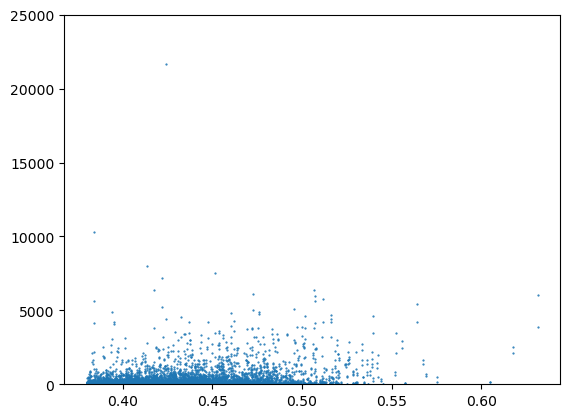

In [122]:
import matplotlib.pyplot as plt

plt.scatter(discovery_insilico_merged_subset['normalized_score'],discovery_insilico_merged_subset['total_count'],s=0.3)
plt.ylim(0, 25000)

In [115]:
print(discovery_insilico_merged_subset[(discovery_insilico_merged_subset.normalized_score >= 0.35) & (discovery_insilico_merged_subset.normalized_score < 0.4)]['total_count'].fillna(0).mean())
print(discovery_insilico_merged_subset[(discovery_insilico_merged_subset.normalized_score >= 0.4) & (discovery_insilico_merged_subset.normalized_score < 0.45)]['total_count'].fillna(0).mean())
print(discovery_insilico_merged_subset[(discovery_insilico_merged_subset.normalized_score >= 0.45) & (discovery_insilico_merged_subset.normalized_score < 0.5)]['total_count'].fillna(0).mean())
print(discovery_insilico_merged_subset[(discovery_insilico_merged_subset.normalized_score >= 0.5) & (discovery_insilico_merged_subset.normalized_score < 0.55)]['total_count'].fillna(0).mean())
print(discovery_insilico_merged_subset[(discovery_insilico_merged_subset.normalized_score >= 0.55) & (discovery_insilico_merged_subset.normalized_score < 0.6)]['total_count'].fillna(0).mean())
print(discovery_insilico_merged_subset[(discovery_insilico_merged_subset.normalized_score >= 0.6) & (discovery_insilico_merged_subset.normalized_score < 0.65)]['total_count'].fillna(0).mean())


3.4555350771270077
22.37816688618579
210.25514285714286
850.6007462686567
1698.75
2481.3333333333335


In [139]:
discovery_insilico_merged_subset[['sequence_x', 'rv_comp_sequence_x','sequence_y', 'rv_comp_sequence_y','seq','seq_x','seq_y']]

,sequence_x,rv_comp_sequence_x,sequence_y,rv_comp_sequence_y,seq,seq_x,seq_y
0,TTTTTTTTTTTGAGCAGCAGCAAGATTTATTGTGAAGAGTGAAAGA,TCTTTCACTCTTCACAATAAATCTTGCTGCTGCTCAAAAAAAAAAA,NaN,NaN,NaN,NaN,NaN
4,CAAGATGGCCTCACTCACAGGACTGGCTGTTGATGGGAGCCTTGAT,ATCAAGGCTCCCATCAACAGCCAGTCCTGTGAGTGAGGCCATCTTG,NaN,NaN,NaN,NaN,NaN
12,GAAGCTGATTTTCTTCATAGCACTTGCTGCCATAGAGATACATTTG,CAAATGTATCTCTATGGCAGCAAGTGCTATGAAGAAAATCAGCTTC,CAAATGTATCTCTATGGCAGCAAGTGCTATGAAGAAAATCAGCTTC,GAAGCTGATTTTCTTCATAGCACTTGCTGCCATAGAGATACATTTG,CAAATGTATCTCTATGGCAGCAAGTGCTATGAAGAAAATCAGCTTC,NaN,NaN
15,AAGAAGAGACATTAAAACTGATACCACAGAAGTTAAAAAATCATAA,TTATGATTTTTTAACTTCTGTGGTATCAGTTTTAATGTCTCTTCTT,NaN,NaN,NaN,NaN,NaN
16,CAGAAGGTTACCAACATCAGAAACCACAGGTAGATAAATCCATGAA,TTCATGGATTTATCTACCTGTGGTTTCTGATGTTGGTAACCTTCTG,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
599794,NaN,NaN,ACCCAGTACATTTCCAGCTGTGGTAGCTATGGTGAAAGACTTCTGT,ACAGAAGTCTTTCACCATAGCTACCACAGCTGGAAATGTACTGGGT,ACCCAGTACATTTCCAGCTGTGGTAGCTATGGTGAAAGACTTCTGT,ACCCAGTACATTTCCAGCTGTGGTAGCTATGGTGAAAGACTTCTGT,ACCCAGTACATTTCCAGCTGTGGTAGCTATGGTGAAAGACTTCTGT
599795,NaN,NaN,GATAGTGGTTTTGACCAGGGTCCTGGCAATGGTGAGAGATGGTTGA,TCAACCATCTCTCACCATTGCCAGGACCCTGGTCAAAACCACTATC,GATAGTGGTTTTGACCAGGGTCCTGGCAATGGTGAGAGATGGTTGA,GATAGTGGTTTTGACCAGGGTCCTGGCAATGGTGAGAGATGGTTGA,GATAGTGGTTTTGACCAGGGTCCTGGCAATGGTGAGAGATGGTTGA
599796,NaN,NaN,GACAATAGTTACAACAGTTGGTTGATCAGTGGCGAGATCTCTCACA,TGTGAGAGATCTCGCCACTGATCAACCAACTGTTGTAACTATTGTC,GACAATAGTTACAACAGTTGGTTGATCAGTGGCGAGATCTCTCACA,GACAATAGTTACAACAGTTGGTTGATCAGTGGCGAGATCTCTCACA,GACAATAGTTACAACAGTTGGTTGATCAGTGGCGAGATCTCTCACA
599797,NaN,NaN,CGCAGGTTTGTGGGCAGCTGCCTGGGCTGTGGGAGCAGCCCGGGCA,TGCCCGGGCTGCTCCCACAGCCCAGGCAGCTGCCCACAAACCTGCG,CGCAGGTTTGTGGGCAGCTGCCTGGGCTGTGGGAGCAGCCCGGGCA,CGCAGGTTTGTGGGCAGCTGCCTGGGCTGTGGGAGCAGCCCGGGCA,CGCAGGTTTGTGGGCAGCTGCCTGGGCTGTGGGAGCAGCCCGGGCA


In [142]:
merged_df

,donor,genome_dinucleotide,chrom,dinucleotide_position_x,strand_x,seq_start,seq_end,seq_x,dinucleotide_position_y,strand_y,seq_y,dinucleotide_position,strand,seq,total_count
0,attP-TG,TG,chr14_KI270724v1_random,1422.0,-,1401,1446,TGCGGGTTTGCGGGCAACCGCCTGGGCTGTGGGAGGAGCCCGGGCA,1422.0,-,TGCGGGTTTGCGGGCAACCGCCTGGGCTGTGGGAGGAGCCCGGGCA,1422.0,-,TGCGGGTTTGCGGGCAACCGCCTGGGCTGTGGGAGGAGCCCGGGCA,21632.0
1,attP-TG,TG,chr14_GL000225v1_random,54366.0,+,54345,54390,CACGGGTTTGCGGGCAGCCGCATGGGCTGTGGGAGCAGCCCGGGCA,54366.0,+,CACGGGTTTGCGGGCAGCCGCATGGGCTGTGGGAGCAGCCCGGGCA,54366.0,+,CACGGGTTTGCGGGCAGCCGCATGGGCTGTGGGAGCAGCCCGGGCA,10277.0
2,attP-CA,CA,chr14_GL000225v1_random,44345.0,-,44324,44369,TGCCCGGGCTGCTCCCACAGCCCAGGCAGCTGCCCGCAAACCCGCG,44345.0,-,TGCCCGGGCTGCTCCCACAGCCCAGGCAGCTGCCCGCAAACCCGCG,44345.0,-,TGCCCGGGCTGCTCCCACAGCCCAGGCAGCTGCCCGCAAACCCGCG,8004.0
3,attP-TG,TG,chr17,31561286.0,-,31561265,31561310,TCCCATAATTCTGACATCTGCATGTTCCACTGGGTAAGCCTCCAGG,31561286.0,-,TCCCATAATTCTGACATCTGCATGTTCCACTGGGTAAGCCTCCAGG,31561286.0,-,TCCCATAATTCTGACATCTGCATGTTCCACTGGGTAAGCCTCCAGG,7531.0
4,attP-CA,CA,chr14_KI270723v1_random,36211.0,-,36190,36235,TACCCGGGCTCCTCCCACAGCCCAGGCGGTTGCCCGCAAACCCGCG,36211.0,-,TACCCGGGCTCCTCCCACAGCCCAGGCGGTTGCCCGCAAACCCGCG,36211.0,-,TACCCGGGCTCCTCCCACAGCCCAGGCGGTTGCCCGCAAACCCGCG,7165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167921,attP-CT,CT,chr8,NaN,NaN,20130041,20130086,NaN,NaN,NaN,NaN,20130062.0,+,GCACCGAAATCAGTCTTTAGAGCTCGCTGTGGCCACAAGTGGGTGC,1.0
167922,attP-GT,GT,chr8,NaN,NaN,20248942,20248987,NaN,NaN,NaN,NaN,20248963.0,+,GTCTATGGCTTAAAGAAGAGTGGTCACCGAGGTCAAAGGTCACTGG,1.0
167923,attP-TG,TG,chr8,NaN,NaN,20302350,20302395,NaN,NaN,NaN,NaN,20302371.0,-,CATATGGGTATTAGAGATAGCATGTACAGACGGGAAAGGTGTTTGT,1.0
167924,attP-AC,AC,chr8,NaN,NaN,20305208,20305253,NaN,NaN,NaN,NaN,20305229.0,-,GGCACTATCTTGGCTCACTGCAACCTCTGCCTTCCAGGCTCAAGCA,1.0
